In [38]:
import numpy as np
import pandas as pd                                               
import sklearn
import xgboost
from xgboost import cv
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor
import sklearn.gaussian_process as gp

In [39]:
train = pd.read_csv('train_method1_rg.csv')
test = pd.read_csv('test_method1_rg.csv')
rs = 1337

In [40]:
Y_train = train['y']
X_train = train.drop(columns = ['y'])

In [41]:
Y_test = test['y']
X_test = test.drop(columns = ['y'])

Mean squared error: 0.22963000332233632 Root Mean squared error: 0.47919724886766235
Validation accuracy is 0.7414614118640466
Training accuracy is 0.868193427984435
Testing accuracy is 0.7715609549626572


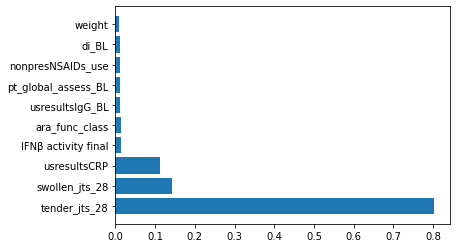

In [42]:
ridge_reg = None
def ridge_reg(X_train, X_test, Y_train,Y_test):
    global ridge_reg
    ridge_reg = sklearn.linear_model.Ridge(random_state = rs)
    ridge_reg.fit(X_train, Y_train)
    results = cross_val_score(ridge_reg, X_train, Y_train, cv=10, scoring="r2")
    preds = ridge_reg.predict(X_test)
    print("Mean squared error:", mean_squared_error(Y_test,preds),"Root Mean squared error:", np.sqrt(mean_squared_error(Y_test,preds)))
    print("Validation accuracy is", results.mean())
    print(f"Training accuracy is {ridge_reg.score(X_train, Y_train)}")
    print(f"Testing accuracy is {ridge_reg.score(X_test, Y_test)}")
    result = permutation_importance(ridge_reg, X_train, Y_train, n_repeats=10, random_state=0, n_jobs=2)
    sorted_index = result.importances_mean.argsort()
    top10 = sorted_index[-10:]
    feature_names = list(X_train.columns)
    top10 = top10[::-1]
    arr_x = []
    arr_y = []
    for i in top10:
        arr_x.append( result.importances_mean[i])
        arr_y.append(feature_names[i])
    plt.barh(arr_y, arr_x)
    plt.show()
ridge_reg(X_train, X_test, Y_train, Y_test)

C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Mean squared error: 0.16251598168281642 Root Mean squared error: 0.40313270976542753
Validation accuracy is 0.8463497017193475
Training accuracy is 0.9318258498561114
Testing accuracy is 0.8271072055221268


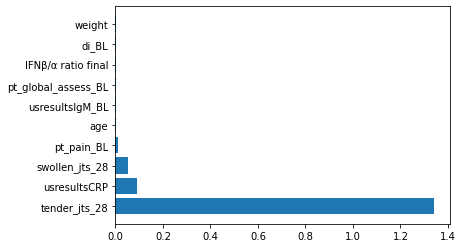

In [8]:
rf_model = None
def random_forest(X_train, X_test, Y_train,Y_test):
    global rf_model
    rf_model = sklearn.ensemble.RandomForestRegressor(n_estimators=474, oob_score = True, criterion='squared_error',max_depth=90, min_samples_split=10, random_state=rs, max_features='auto', min_samples_leaf = 6)
    rf_model.fit(X_train, Y_train)
    preds = rf_model.predict(X_test)
    print("Mean squared error:", mean_squared_error(Y_test,preds),"Root Mean squared error:", np.sqrt(mean_squared_error(Y_test,preds)))
    print("Validation accuracy is", rf_model.oob_score_)
    print(f"Training accuracy is {rf_model.score(X_train, Y_train)}")
    print(f"Testing accuracy is {rf_model.score(X_test, Y_test)}")
    result = permutation_importance(rf_model, X_train, Y_train, n_repeats=10, random_state=0, n_jobs=2)
    sorted_index = result.importances_mean.argsort()
    top10 = sorted_index[-10:]
    feature_names = list(X_train.columns)
    top10 = top10[::-1]
    arr_x = []
    arr_y = []
    for i in top10:
        arr_x.append( result.importances_mean[i])
        arr_y.append(feature_names[i])
    plt.barh(arr_y, arr_x)
    plt.show()
random_forest(X_train, X_test, Y_train, Y_test)

Mean squared error: 0.10075756499329117 Root Mean squared error: 0.31742332143888097
Validation accuracy is 0.659266769161136
Training accuracy is 0.9420503695734179
Testing accuracy is 0.8928089607182432


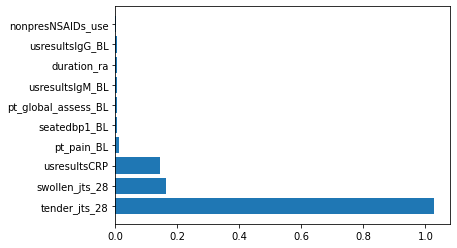

In [13]:
xgb_model = None
def xgboost(X_train, X_test,Y_train, Y_test):
    global xgb_model
    xgb_model = XGBRegressor(n_estimators = 200, random_state=rs, subsample=0.8, max_depth=50, eta=0.5, gamma=1, min_child_weight=10, alpha=1)
    xgb_model.fit(X_train, Y_train)
    results = cross_val_score(xgb_model, X_train, Y_train, cv=10)
    preds = xgb_model.predict(X_test)
    print("Mean squared error:", mean_squared_error(Y_test,preds),"Root Mean squared error:", np.sqrt(mean_squared_error(Y_test,preds)))
    print("Validation accuracy is", results.mean())
    print(f"Training accuracy is {xgb_model.score(X_train, Y_train)}")
    print(f"Testing accuracy is {xgb_model.score(X_test, Y_test)}")
    result = permutation_importance(xgb_model, X_train, Y_train, n_repeats=10, random_state=0, n_jobs=2)
    sorted_index = result.importances_mean.argsort()
    top10 = sorted_index[-10:]
    feature_names = list(X_train.columns)
    top10 = top10[::-1]
    arr_x = []
    arr_y = []
    for i in top10:
        arr_x.append( result.importances_mean[i])
        arr_y.append(feature_names[i])
    plt.barh(arr_y, arr_x)
    plt.show()
    plt.show()
xgboost(X_train, X_test, Y_train, Y_test)

C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: U

C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: U

Mean squared error: 0.1131374715452235 Root Mean squared error: 0.3363591407189992
Validation accuracy is: 0.6384646087145478
Training accuracy is 0.9456293811281076
Testing accuracy is 0.8796385843837118


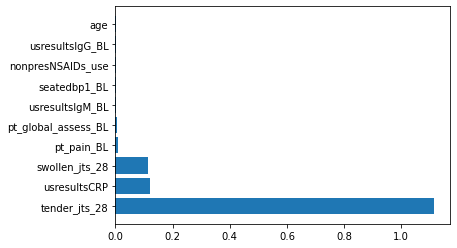

In [20]:
st_reg = None
def stacking_classifier(X_train, X_test,Y_train, Y_test):
    global st_reg
    rr = sklearn.linear_model.Ridge(random_state = rs)
    SVR = svm.SVR(kernel = 'rbf')
    xgb = XGBRegressor(n_estimators = 200, subsample=0.8, max_depth=50, eta=0.5, gamma=1, min_child_weight=10, alpha=1, random_state=rs)   
    rf = sklearn.ensemble.RandomForestRegressor(n_estimators=474, oob_score = True, criterion='squared_error',max_depth=90, min_samples_split=10, max_features='auto', min_samples_leaf = 6, random_state = rs)
    NB = gp.GaussianProcessRegressor(n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
    knn = KNeighborsRegressor(n_neighbors=10)
    st_reg = StackingRegressor(estimators =[('xgb',xgb),('rf',rf)], final_estimator = rr)
    st_reg = st_reg.fit(X_train, Y_train)
    kfold = StratifiedKFold(n_splits=10)
    results = cross_val_score(st_reg, X_train, Y_train, cv=10)
    preds = st_reg.predict(X_test)
    print("Mean squared error:", mean_squared_error(Y_test,preds),"Root Mean squared error:", np.sqrt(mean_squared_error(Y_test,preds)))
    print("Validation accuracy is:", results.mean())
    print(f"Training accuracy is {st_reg.score(X_train, Y_train)}")
    print(f"Testing accuracy is {st_reg.score(X_test, Y_test)}")
    result = permutation_importance(st_reg, X_train, Y_train, n_repeats=10, random_state=0, n_jobs=2)
    sorted_index = result.importances_mean.argsort()
    top10 = sorted_index[-10:]
    feature_names = list(X_train.columns)
    top10 = top10[::-1]
    arr_x = []
    arr_y = []
    for i in top10:
        arr_x.append( result.importances_mean[i])
        arr_y.append(feature_names[i])
    plt.barh(arr_y, arr_x)
    plt.show()
stacking_classifier(X_train, X_test, Y_train, Y_test)